In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate dynamic renaming based on column positions
def dynamic_rename(file_path, algorithm):
    # Read the CSV to get column names
    df = pd.read_csv(file_path)
    
    # Map 4th to 8th columns dynamically
    rename_dict = {
        df.columns[3]: 'time',
        df.columns[4]: 'fitness',
        df.columns[5]: 'cpu_util',
        df.columns[6]: 'bw_util',
        df.columns[7]: 'ram_util'
    }
    
    # Rename the necessary columns
    df.rename(columns=rename_dict, inplace=True)
    
    # Add algorithm name column
    df['algorithm'] = algorithm
    
    return df

# Function to filter by cloudlet cases
def filter_by_cloudlets(df):
    cloudlet_cases = [100, 80, 60]
    filtered_dfs = []
    for cloudlet in cloudlet_cases:
        filtered_df = df[df['cloudlets'] == cloudlet].copy()
        filtered_df['cloudlet_case'] = f'{cloudlet} Cloudlets'
        filtered_dfs.append(filtered_df)
    return pd.concat(filtered_dfs, axis=0)

# Function to plot comparisons for all metrics
def plot_comparisons(combined_df):
    sns.set(style="whitegrid")
    metrics = ['time', 'fitness', 'cpu_util', 'bw_util', 'ram_util']
    titles = ['Time Comparison', 'Fitness Comparison', 'CPU Utilization Comparison', 
              'Bandwidth Utilization Comparison', 'RAM Utilization Comparison']

    # Create box plots
    for i, metric in enumerate(metrics):
        if metric not in combined_df.columns:
            print(f"Warning: Metric '{metric}' not found in DataFrame.")
            continue
            
        plt.figure(figsize=(14, 5))
        sns.boxplot(x='cloudlet_case', y=metric, hue='algorithm', data=combined_df)
        plt.title(f'Box Plot: {titles[i]}')
        plt.ylabel(metric.capitalize())
        plt.legend(title='Algorithm')
        plt.show()

    # Create bar plots
    for i, metric in enumerate(metrics):
        if metric not in combined_df.columns:
            print(f"Warning: Metric '{metric}' not found in DataFrame.")
            continue

        # Calculate mean values for bar plot
        mean_values = combined_df.groupby(['cloudlet_case', 'algorithm'])[metric].mean().reset_index()
        
        plt.figure(figsize=(14, 5))
        sns.barplot(x='cloudlet_case', y=metric, hue='algorithm', data=mean_values)
        plt.title(f'Bar Plot: {titles[i]}')
        plt.ylabel(metric.capitalize())
        plt.legend(title='Algorithm')
        plt.show()

# Function to summarize statistics
def summarize_statistics(df, metrics):
    for metric in metrics:
        print(f"\n{metric.capitalize()} by Cloudlet Case and Algorithm:")
        summary_stats = df.groupby(['cloudlet_case', 'algorithm'])[metric].agg(['mean', 'std'])
        print(summary_stats)


In [8]:
input_woa=dynamic_rename(r'C:\Users\User\eclipse-workspace\woa.csv','WOA')
input_fwa=dynamic_rename(r'C:\Users\User\eclipse-workspace\fwa.csv','FWA')
input_seq=dynamic_rename(r'C:\Users\User\eclipse-workspace\seq.csv','SEQ')
input_par=dynamic_rename(r'C:\Users\User\eclipse-workspace\cloudsimplus-simulation_ugrad_thesis\para_best_time.csv','PAR')
input_encl1_3=dynamic_rename(r'C:\Users\User\eclipse-workspace\cloudsimplus-simulation_ugrad_thesis\encl1_3.csv','ENCL1_3')
input_encl2_1=dynamic_rename(r'C:\Users\User\eclipse-workspace\cloudsimplus-simulation_ugrad_thesis\encl2_1.csv','ENCL2_1')
input_sprk1=dynamic_rename(r'C:\Users\User\eclipse-workspace\cloudsimplus-simulation_ugrad_thesis\sprk1.csv','SPRK_1')
input_wgoa=dynamic_rename(r'C:\Users\User\eclipse-workspace\cloudsimplus-simulation_ugrad_thesis\wgoatless.csv','WGOA')
input_pso=dynamic_rename(r'C:\Users\User\eclipse-workspace\cloudsimplus-simulation_ugrad_thesis\PSO.csv','PSO')
input_aco=dynamic_rename(r'C:\Users\User\eclipse-workspace\cloudsimplus-simulation_ugrad_thesis\ACO.csv','ACO')

Index(['hosts', 'vms', 'cloudlets', 'time', 'fitness', 'cpu_util', 'bw_util',
       'ram_util', 'woa_power', 'woa_cpu_mean', 'woa_cpu_std', 'algorithm',
       'cloudlet_case', 'fwa_power', 'fwa_cpu_mean', 'fwa_cpu_std',
       'seq_power', 'seq_cpu_mean', 'seq_cpu_std', 'par_power', 'par_cpu_mean',
       'par_cpu_std', 'enc_power', 'enc_cpu_mean', 'enc_cpu_std', 'spk_power',
       'spk_cpu_mean', 'spk_cpu_std', 'wgoa_power', 'wgoa_cpu_mean',
       'wgoa_cpu_std', 'pso_power', 'pso_cpu_mean', 'pso_cpu_std', 'aco_power',
       'aco_cpu_mean', 'aco_cpu_std'],
      dtype='object')


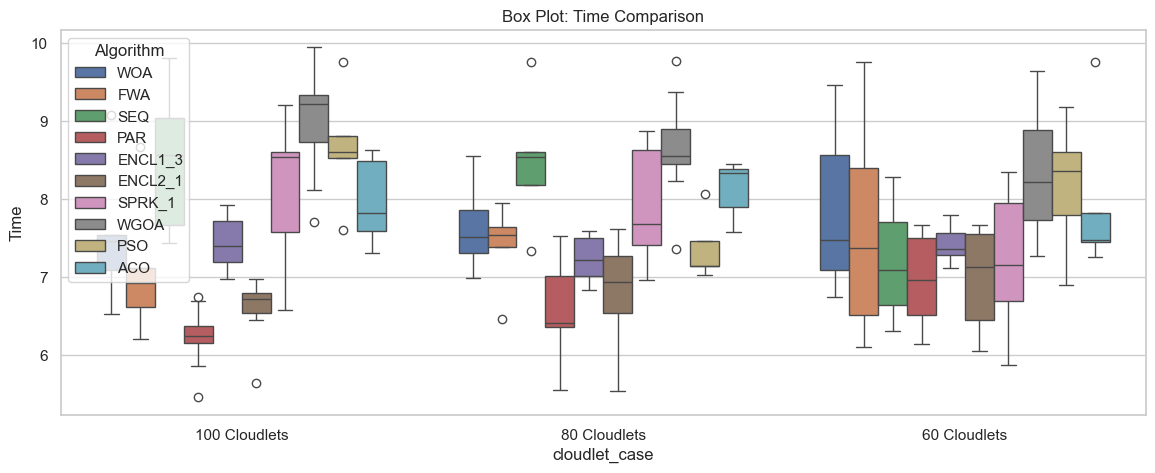

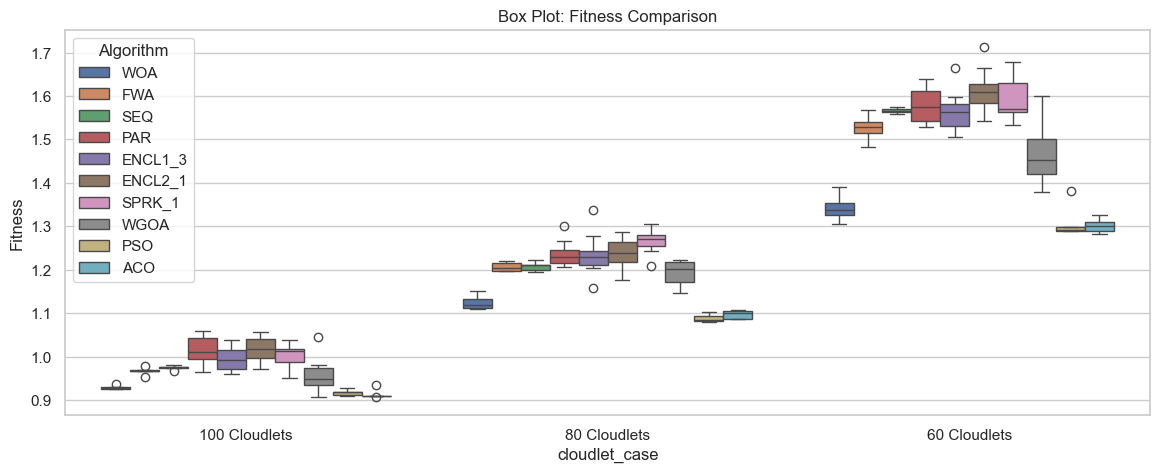

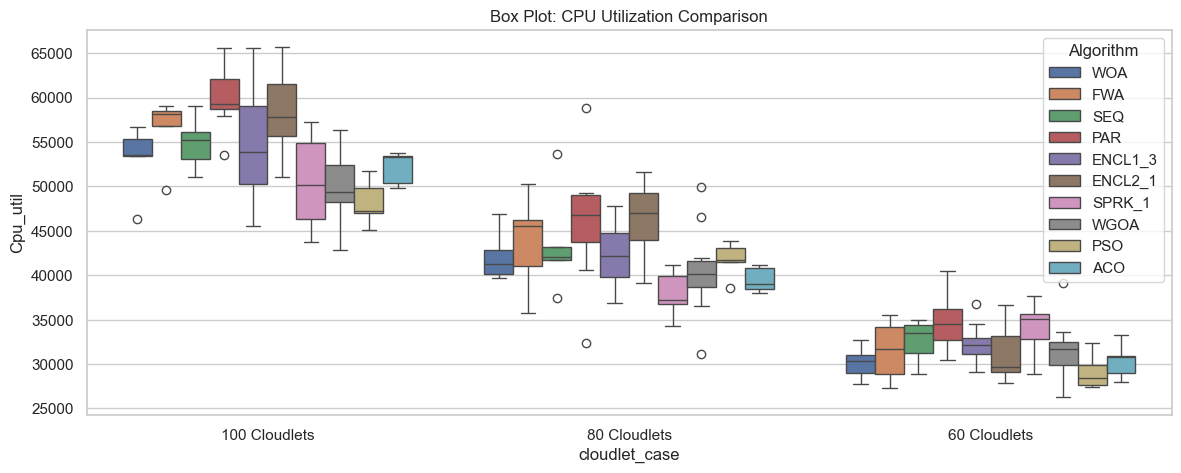

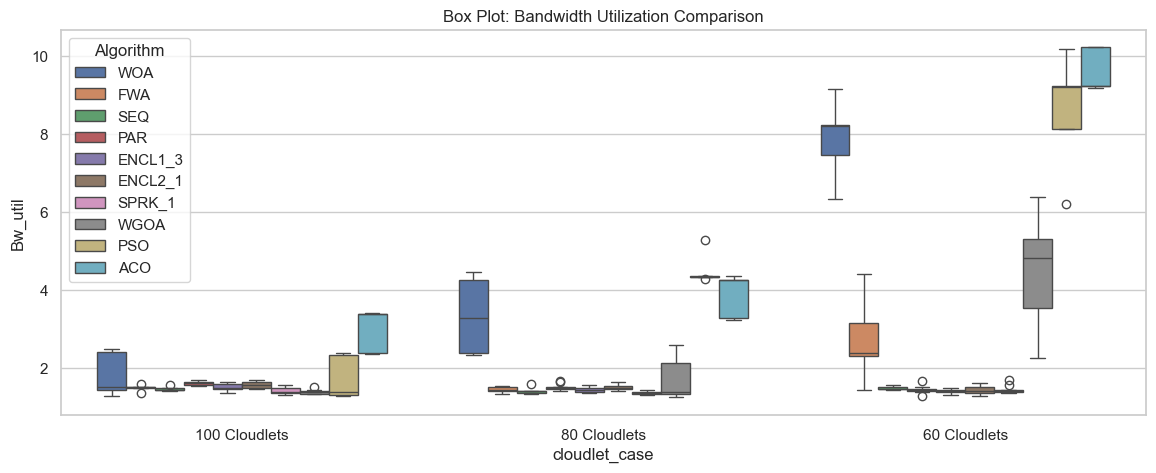

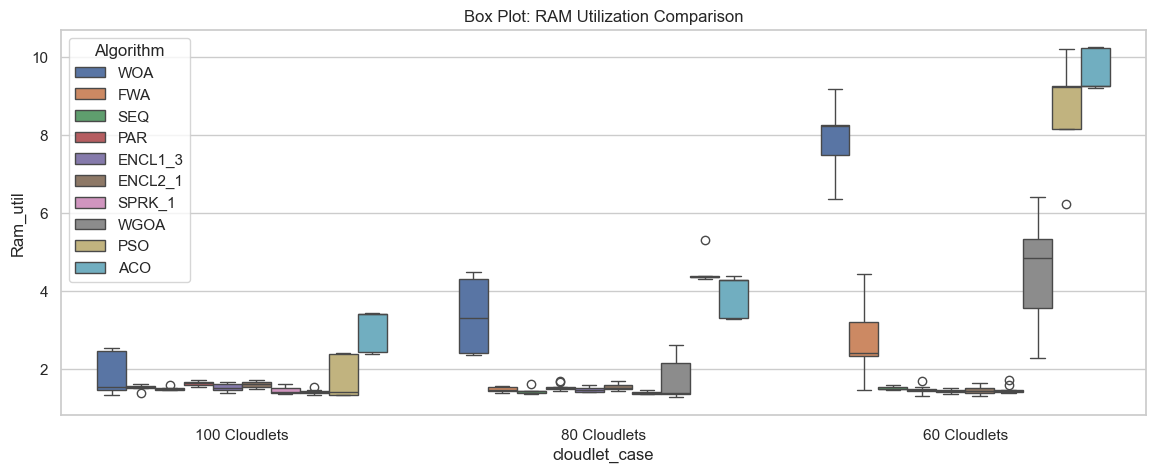

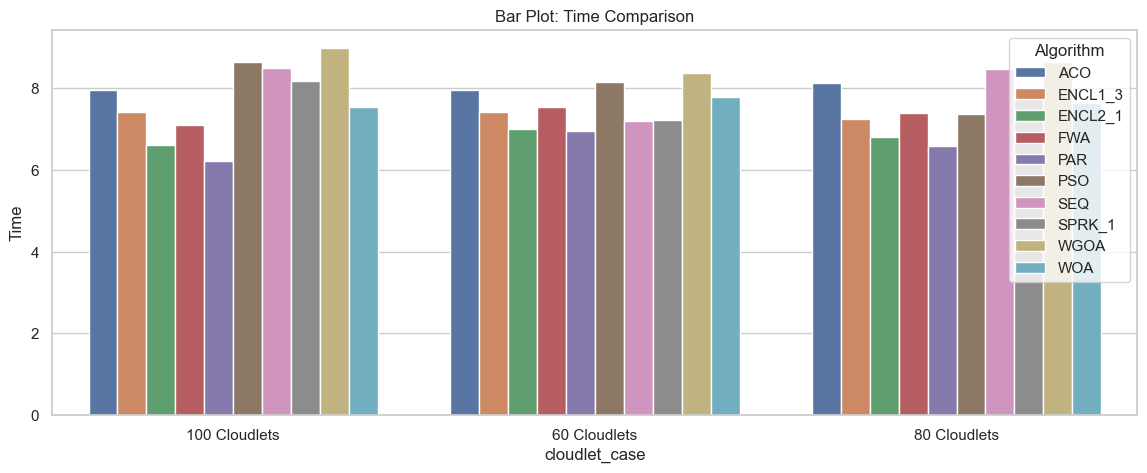

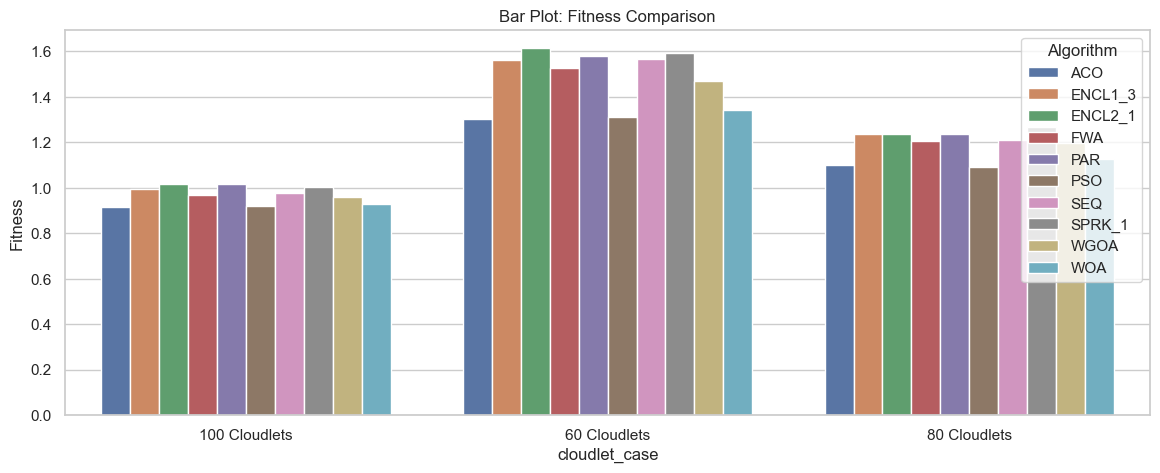

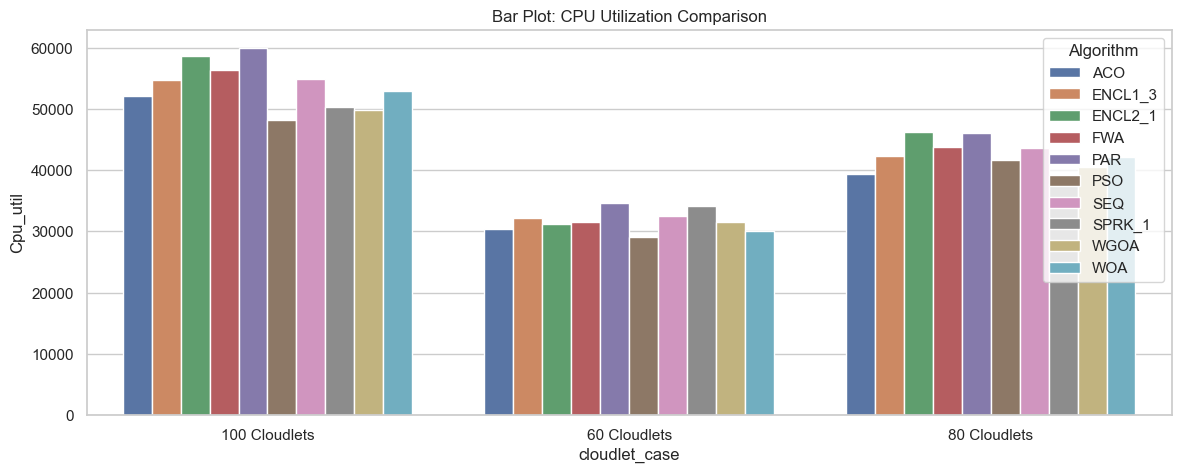

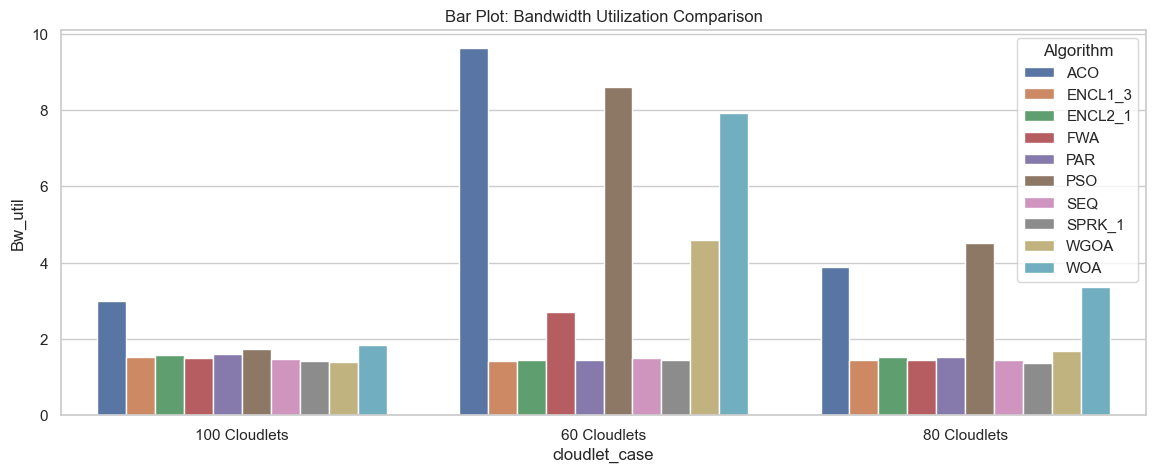

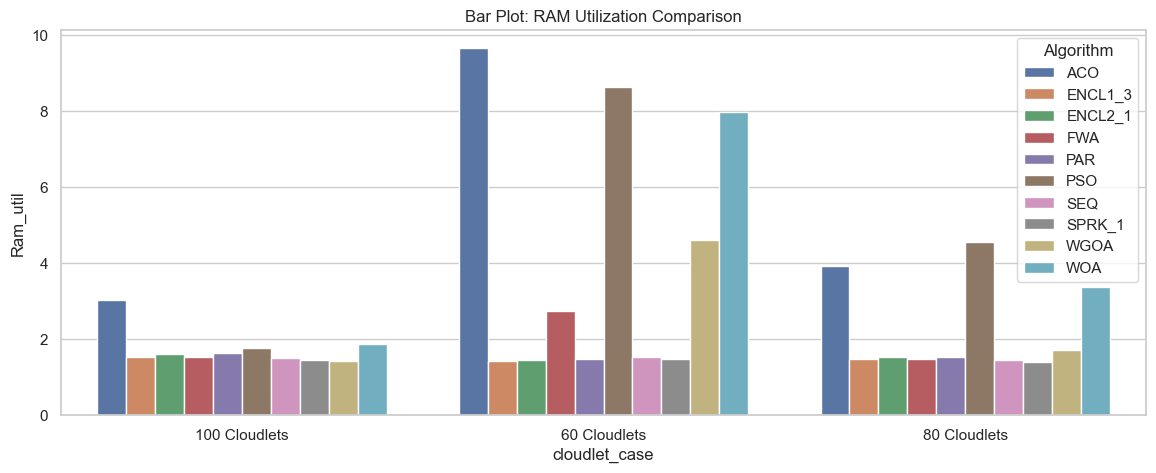


Fitness by Cloudlet Case and Algorithm:
                             mean       std
cloudlet_case algorithm                    
100 Cloudlets ACO        0.914440  0.011423
              ENCL1_3    0.995757  0.028073
              ENCL2_1    1.017466  0.030566
              FWA        0.967375  0.009134
              PAR        1.015446  0.032522
              PSO        0.917706  0.007003
              SEQ        0.974712  0.004354
              SPRK_1     1.003641  0.029698
              WGOA       0.957355  0.038672
              WOA        0.929808  0.004291
60 Cloudlets  ACO        1.301687  0.017544
              ENCL1_3    1.562172  0.047533
              ENCL2_1    1.612985  0.050178
              FWA        1.527111  0.025500
              PAR        1.579322  0.040493
              PSO        1.310392  0.040218
              SEQ        1.566214  0.006041
              SPRK_1     1.591213  0.046695
              WGOA       1.468501  0.070667
              WOA        1.341045  

In [9]:
# Filter datasets by cloudlet cases
filtered_woa = filter_by_cloudlets(input_woa)
filtered_fwa = filter_by_cloudlets(input_fwa)
filtered_seq = filter_by_cloudlets(input_seq)
filtered_par = filter_by_cloudlets(input_par)
filtered_encl1_3=filter_by_cloudlets(input_encl1_3)
filtered_encl2_1=filter_by_cloudlets(input_encl2_1)
filtered_sprk_1=filter_by_cloudlets(input_sprk1)
filtered_wgoa=filter_by_cloudlets(input_wgoa)
filtered_pso=filter_by_cloudlets(input_pso)
filtered_aco=filter_by_cloudlets(input_aco)
# Combine all datasets into one
combined_df = pd.concat([filtered_woa, filtered_fwa, filtered_seq, filtered_par, filtered_encl1_3, filtered_encl2_1, filtered_sprk_1, filtered_wgoa, filtered_pso, filtered_aco], axis=0)

print(combined_df.columns)
# Plot comparisons
plot_comparisons(combined_df)

# Summarize statistics
metrics = ['fitness', 'cpu_util', 'bw_util', 'ram_util', 'time']
summarize_statistics(combined_df, metrics)